In [9]:
class Parent:
    def __init__(self, c, d):
        self.c = c
        self.d = d
    
    def add(self, a,b):
        print(self._add(a,b))
        
    def _add(self, a,b):
        print('parent method')
        return a+b
    
class Child(Parent):
    def __init__(self, *args, **kwargs):
    
        self.e = 'hi'
        return super().__init__(*args, **kwargs)

    
    def _add(self, a,b):
        print('child method')
        return a+b    

In [10]:
p = Parent(1,2)
c = Child(1,2)

print(c.e)

hi


In [5]:
ethnicities = {
    "Latin American": 0,
    "Caucasian": 1,
    "African Descent": 2,
    "Asian": 3,
    "Indian subcontinent origin": 4,
    "Native American": 5,
    "Multi-racial": 6,
}

ethnicity_list = list(ethnicities)

print(ethnicity_list)

for test in ['c2st', 'muks', 'mmdd']:
    for ethnicity in ethnicity_list:
        
        subgroup_q = [ethnicity]
        
        
        ethnicity_string = ethnicity.replace(" ", "")
        
        config_template = f"../config/lightning/eyepacs_quality_{test}.yaml"
        config_out = f"../config/lightning/eyepacs_ethnicity_{ethnicity_string}_{test}.yaml"
        
        from utils.config import load_config
        import yaml
        
        params = load_config(config_template)

        params['dataset']['ds']['p']['subset_params'] = {'patient_ethnicity': ethnicity_list}
        params['dataset']['ds']['q']['subset_params'] = {'patient_ethnicity': subgroup_q}


        with open(config_out, 'w') as fhandle:
            yaml.dump(params, fhandle, default_flow_style=False)
        
        
        # TODO load config template
        
        # TODO replace subgroup
        
        # TODO save config with appropriate name
        

['Latin American', 'Caucasian', 'African Descent', 'Asian', 'Indian subcontinent origin', 'Native American', 'Multi-racial']


In [7]:
print(str(float(2)))

2.0


In [1]:
import numpy as np
from openTSNE import TSNE
from utils.tsne_utils import plot

feat = np.load('../val_feat.npy')
feat_p = np.load('../val_feat_p.npy')


In [14]:
print(feat.shape)
print(feat_p.shape)

stacked = np.concatenate((feat_p,feat_p))

print(stacked.shape)


(2, 9984, 128)
(9984, 128)
(19968, 128)


In [17]:
y = np.ones(feat_p.shape[0])


labels_p = np.ones(feat_p.shape[0])
labels_q = np.zeros(feat_p.shape[0])

y = np.concatenate([labels_p, labels_q], 0).squeeze()

print(y.shape)

(19968,)


In [5]:

# TODO run t-sne
tsne = TSNE()
embedding = tsne.fit(feat_p)


TypeError: plot() missing 1 required positional argument: 'y'

(9984,)


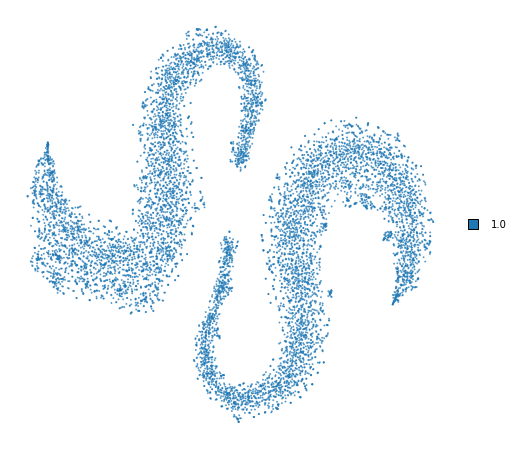

In [11]:
import matplotlib.pyplot  as plt

y = np.ones(feat_p.shape[0])

print(y.shape)

# TODO plot
fig, ax = plot(embedding, y)

# out_fig = os.path.join(log_dir, f"{split}_tsne.pdf")

# fig.savefig(out_fig)


In [22]:
import glob
import os

artifacts_dir = "/home/lkoch/devel/subgroup-shift-detection/experiments/debug_task/mnist/muks"
hash_string = "1ceff45698dc8f7eb08cc88d0b45482d"

log_dir = os.path.join(
    artifacts_dir,
    hash_string,
)

versions = os.listdir(log_dir)

checkpoint_dir = os.path.join(log_dir, versions[-1], "checkpoints")

print(checkpoint_dir)

checkpoint_path = glob.glob(f"{checkpoint_dir}/best-loss-*.ckpt")[0]

print(checkpoint_path)


/home/lkoch/devel/subgroup-shift-detection/experiments/debug_task/mnist/muks/1ceff45698dc8f7eb08cc88d0b45482d/version_1/checkpoints
/home/lkoch/devel/subgroup-shift-detection/experiments/debug_task/mnist/muks/1ceff45698dc8f7eb08cc88d0b45482d/version_1/checkpoints/best-loss-epoch=0-step=7.ckpt


In [7]:
from core.model import EyepacsClassifier
from utils.config import hash_dict, load_config, save_config

params = load_config("/home/lkoch/devel/subgroup-shift-detection/config/lightning/eyepacs_quality_muks.yaml")

# model_path = "/home/lkoch/mnt/slurm_work/exp_lightning/task/eyepacs_data_frac/muks/d478a4d44fcb7f2f19e37fd3cdf3a0af/version_1/checkpoints/best-loss-epoch=1-step=96.ckpt"
model_path = "/home/lkoch/mnt/slurm_work/exp_lightning/eyepacs/task_eyepacs_data_frac/muks/d478a4d44fcb7f2f19e37fd3cdf3a0af/version_0/checkpoints/best-loss-epoch=24-step=1200.ckpt"


module = EyepacsClassifier
model = module(**params["task_classifier"]["model"])

model = module.load_from_checkpoint(model_path, strict=False)

